<a href="https://colab.research.google.com/github/Katharina-github/PP_ObesityLevel/blob/main/PP_RiskOfObesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Prediction of Obesity Levels Based On Eating Habits and Physical Condition

Table of contents

EDA
 - inspection of the dataset
 - univariate analysis
 - bivariate analysis
 - multivariate analysis


 Creation of a predictive model

 - pre pocessing
 - traditional Machine Learning algorithmens (Logistic regression, KNN, Decision tree)
 - optimized Machine Learning algorithm (XGBoost)
 - Dense Neural Network (AI)
 - Comparison of the results

Loading the dataset from local machine - Estimation of Obesity Levels Based On Eating Habits and Physical Condition

In [1]:
from google.colab import files

uploaded = files.upload()


Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic.csv


In [2]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['ObesityDataSet_raw_and_data_sinthetic.csv']))


# EDA

In [3]:
# Inspect the dataset
print(df.head())  # Display the first few rows
print(df.info())  # Overview of column names, data types, and non-null counts
print(df.describe())  # Summary statistics for numerical columns

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

Check for missing values

In [4]:
# Check for missing values
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


The database contains no missing values.

In [5]:
#checking duplicate values
df.nunique()

,0
Gender,2
Age,1402
Height,1574
Weight,1525
family_history_with_overweight,2
FAVC,2
FCVC,810
NCP,635
CAEC,4
SMOKE,2


These results are fitting with the dataset description:

Variable Name	Role	Type	Demographic	Description	Units	Missing Values

Gender	Feature	Categorical	Gender			no

Age	Feature	Continuous	Age			no

Height	Feature	Continuous				no

Weight	Feature	Continuous				no

family_history_with_overweight	Feature	Binary		Has a family member suffered or suffers from overweight?		no

FAVC	Feature	Binary		Do you eat high caloric food frequently?		no

FCVC	Feature	Integer		Do you usually eat vegetables in your meals?		no

NCP	Feature	Continuous		How many main meals do you have daily?		no

CAEC	Feature	Categorical		Do you eat any food between meals?		no

SMOKE	Feature	Binary		Do you smoke?		no

CH2O	Feature	Continuous		How much water do you drink daily?		no

SCC	Feature	Binary		Do you monitor the calories you eat daily?		no

FAF	Feature	Continuous		How often do you have physical activity?		no

TUE	Feature	Integer		How much time do you use technological devices such as cell phone, videogames, television, computer and others?		no

CALC	Feature	Categorical		How often do you drink alcohol?		no

MTRANS	Feature	Categorical		Which transportation do you usually use?		no

NObeyesdad	Target	Categorical		Obesity level		no

## Univariate Analysis - Examine numerical and categorical features to understand their distributions

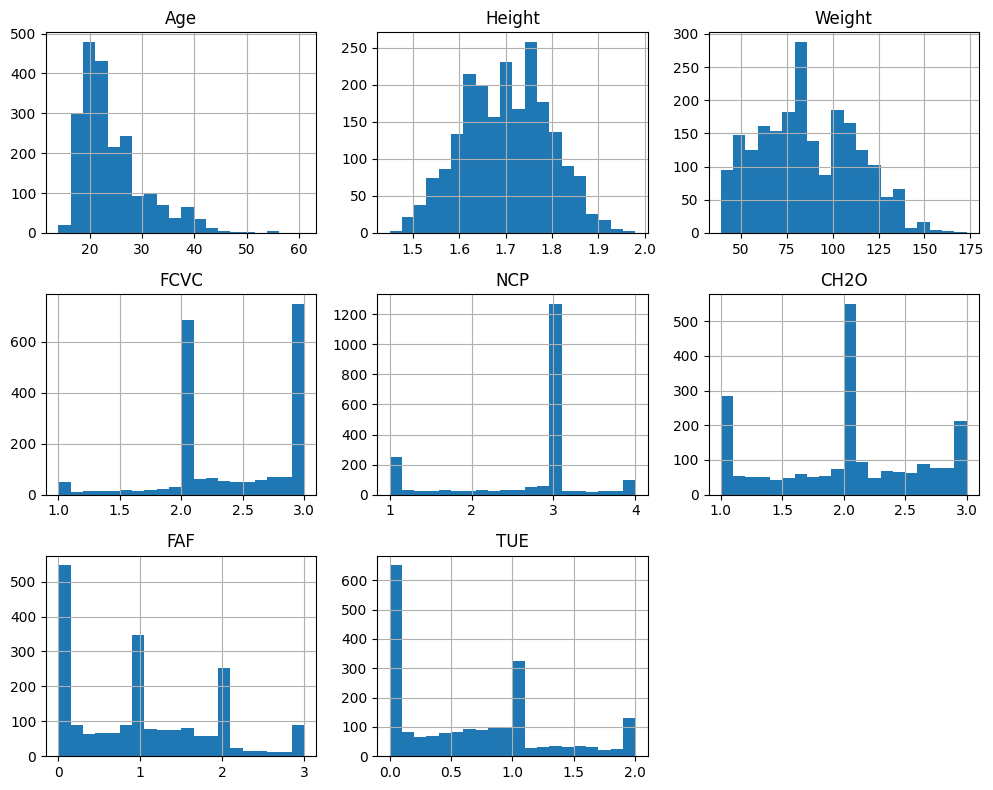

Gender
Male      1068
Female    1043
Name: count, dtype: int64


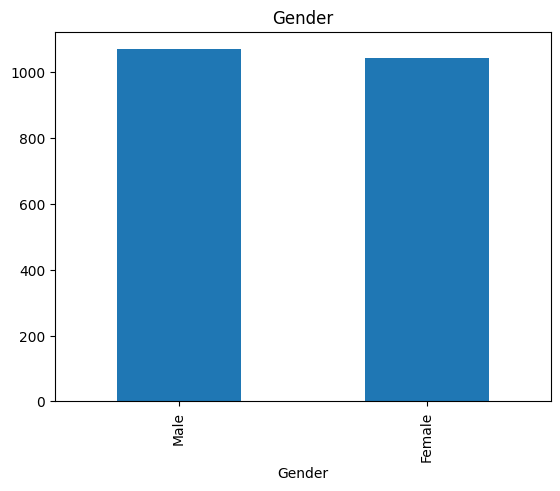

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64


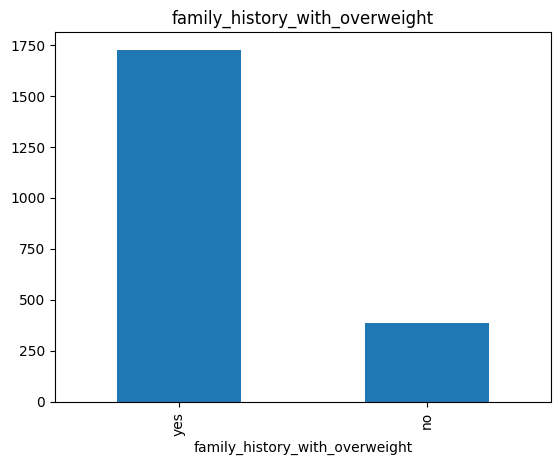

FAVC
yes    1866
no      245
Name: count, dtype: int64


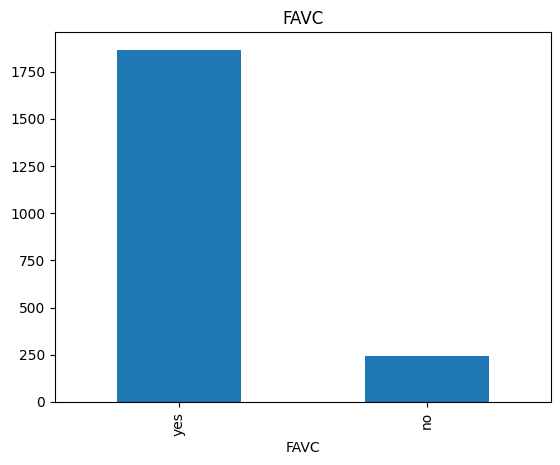

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64


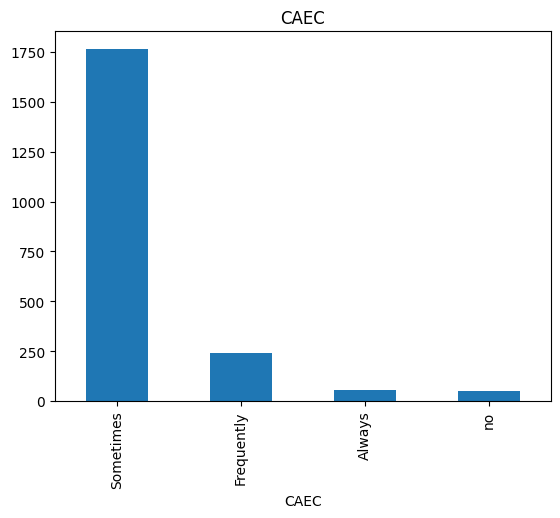

SMOKE
no     2067
yes      44
Name: count, dtype: int64


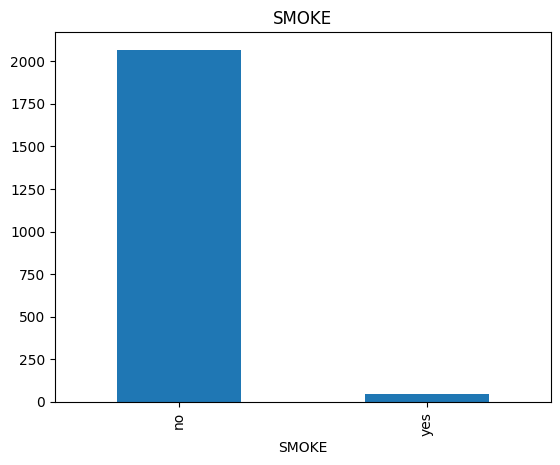

SCC
no     2015
yes      96
Name: count, dtype: int64


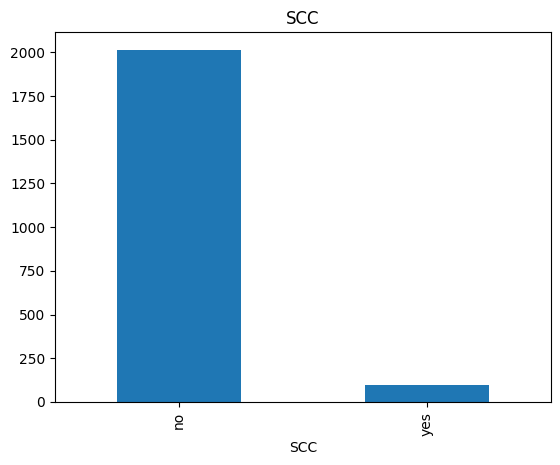

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64


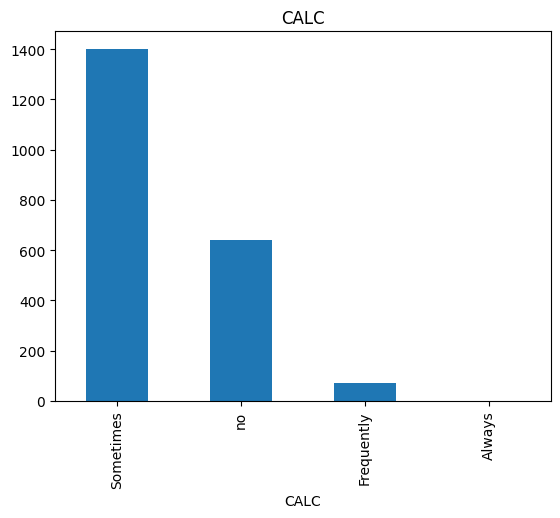

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


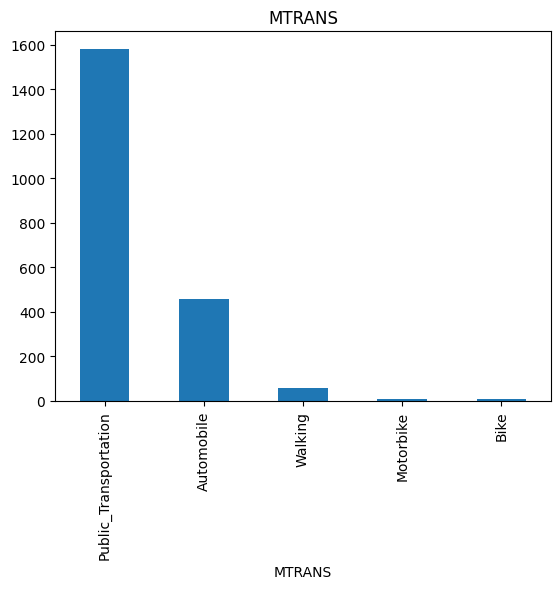

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


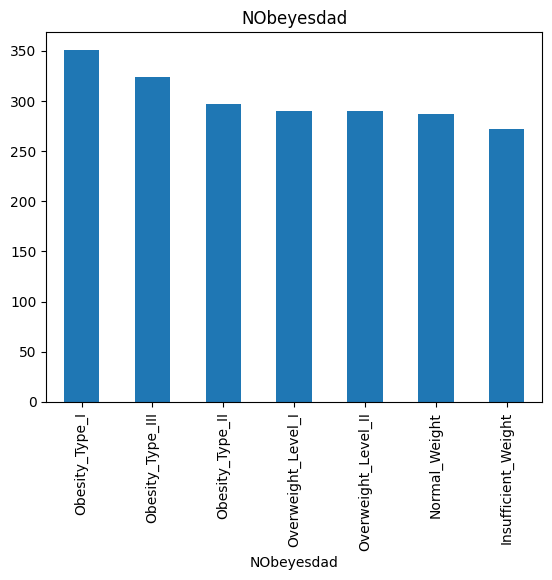

In [6]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns
numerical_cols = df.select_dtypes(include=["float64"]).columns
df[numerical_cols].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

# Categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(df[col].value_counts())
    df[col].value_counts().plot(kind="bar")
    plt.title(col)
    plt.show()

The dataset reveals no significant surprises in terms of eating habits and physical activity behaviors. The distribution of male and female participants is balanced, with the majority being young adults between the ages of 15 and 30. However, a notable portion of individuals have a high weight exceeding 100 kg, a family history of obesity, and obesity themselves.

Further analysis revealed that the initial dataset was expanded using synthetically generated data to balance the obesity categories. Initially, the dataset was imbalanced, with normal weight being the most prevalent and overweight and obesity categories underrepresented. This imbalance posed a challenge for machine learning models, as they were likely to favor the majority class (normal weight) while underperforming in identifying less frequent categories, such as obesity. To address this issue, balancing techniques were applied, resulting in a more even distribution across all obesity categories, enabling more robust and unbiased model performance.

# Bivariate Analysis - Looking for correlations and patterns

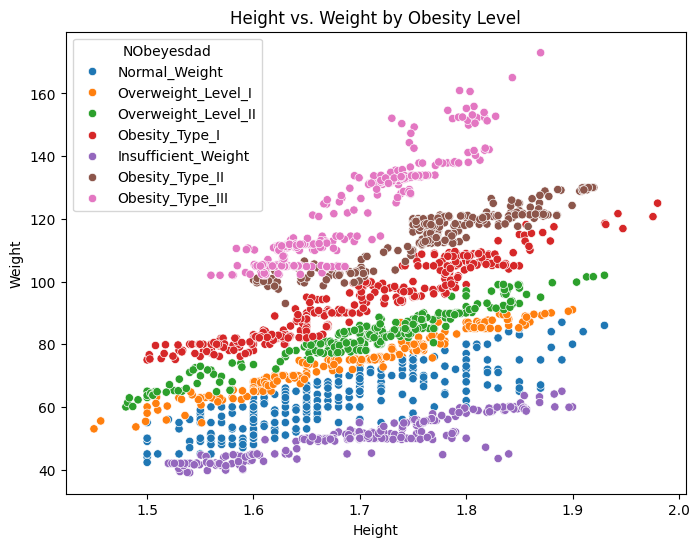

In [7]:
# Scatterplot: Height vs. Weight color-coded by Obesity Level
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Height", y="Weight", hue="NObeyesdad", palette="tab10")
plt.title("Height vs. Weight by Obesity Level")
plt.show()

Interpretation: The scatterplot reveals a clear relationship between height, weight, and obesity level. This is expected, as obesity levels are derived from the Body Mass Index (BMI), which is calculated using height and weight. The visualization reinforces this inherent dependency, with distinct clusters forming based on obesity categories.

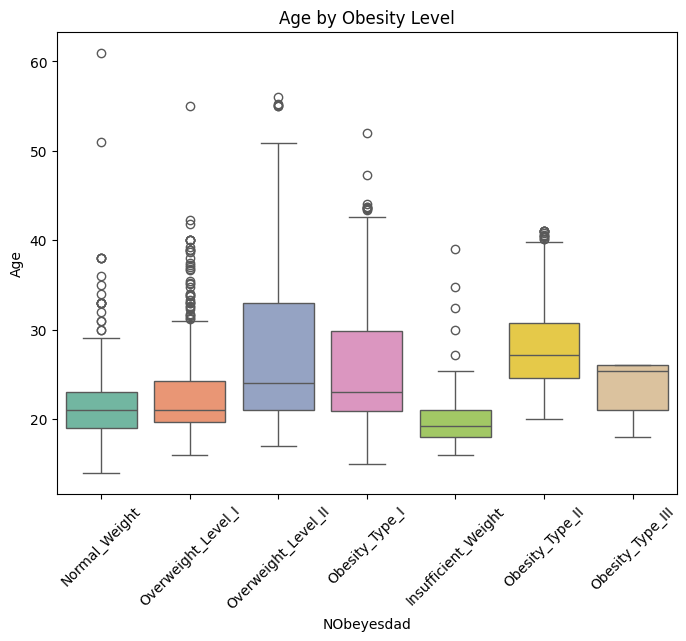

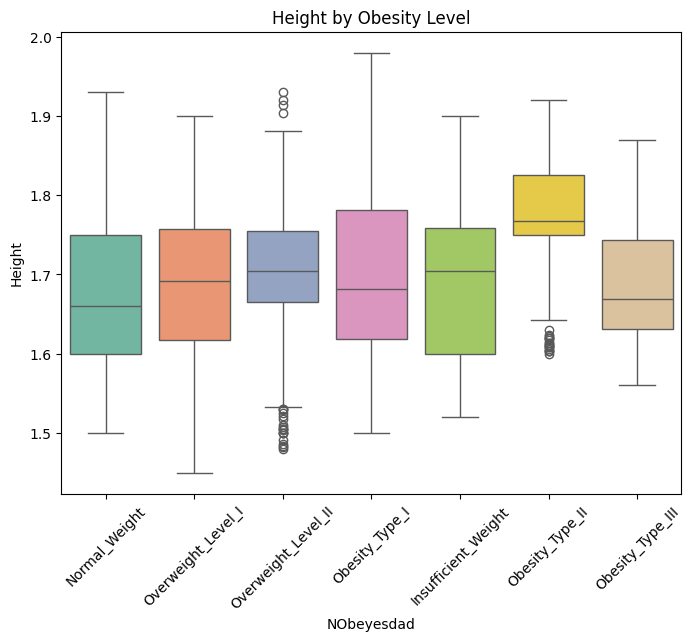

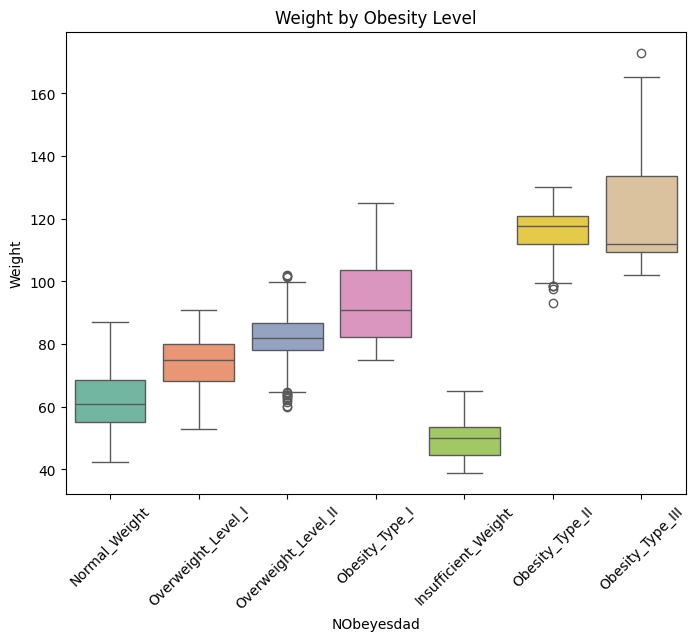

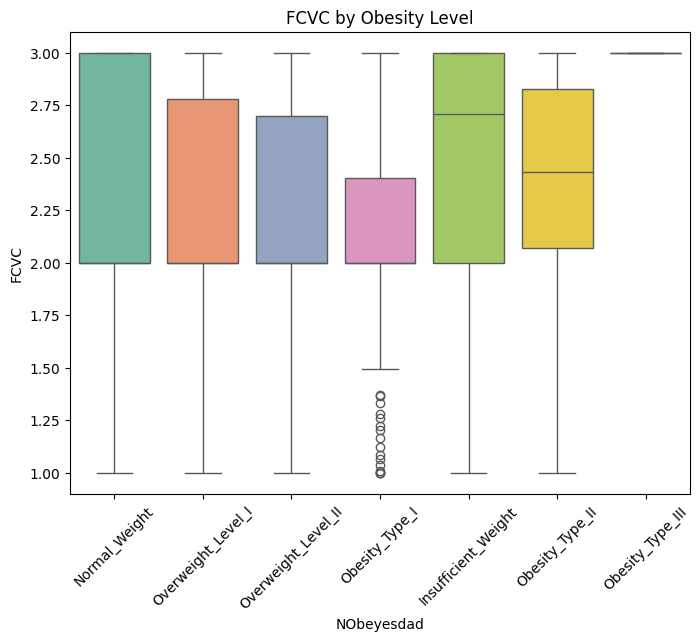

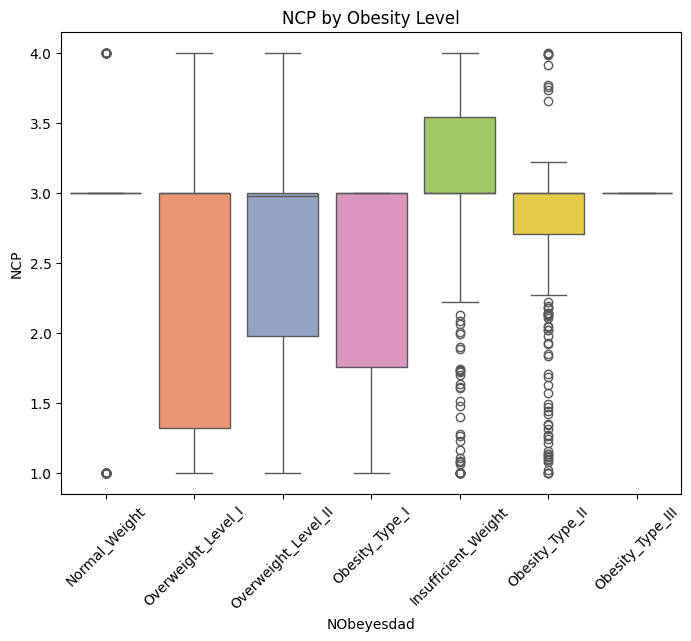

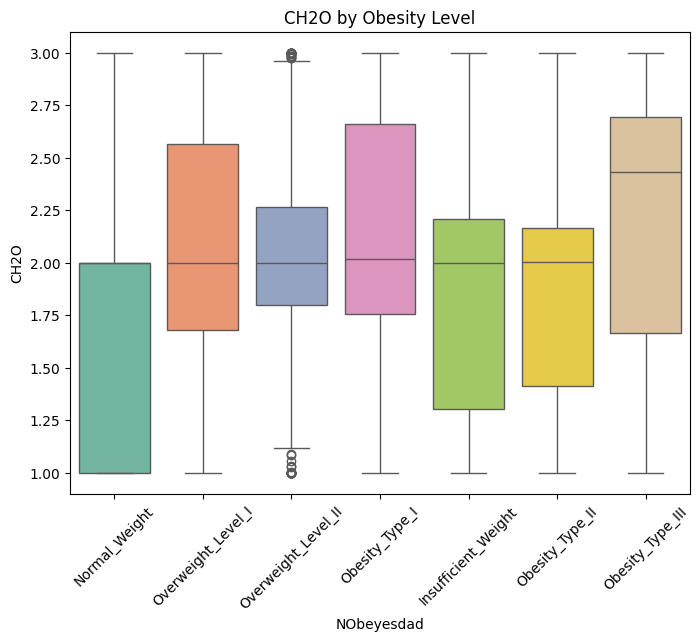

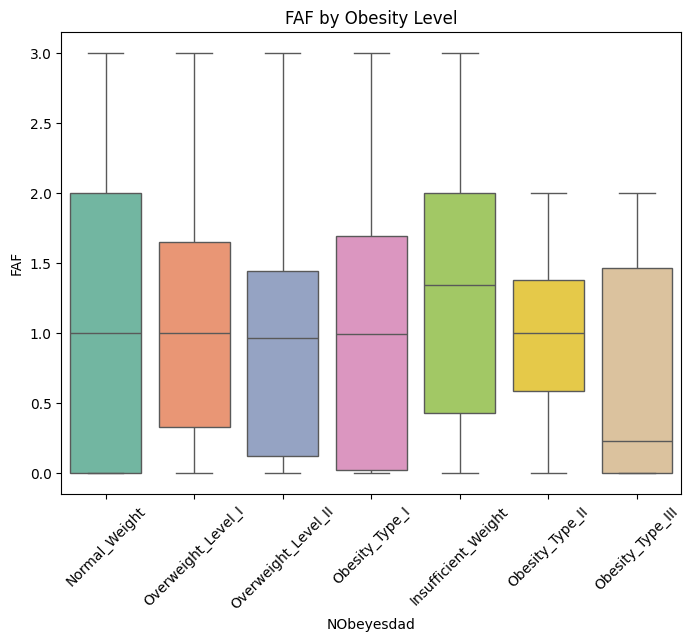

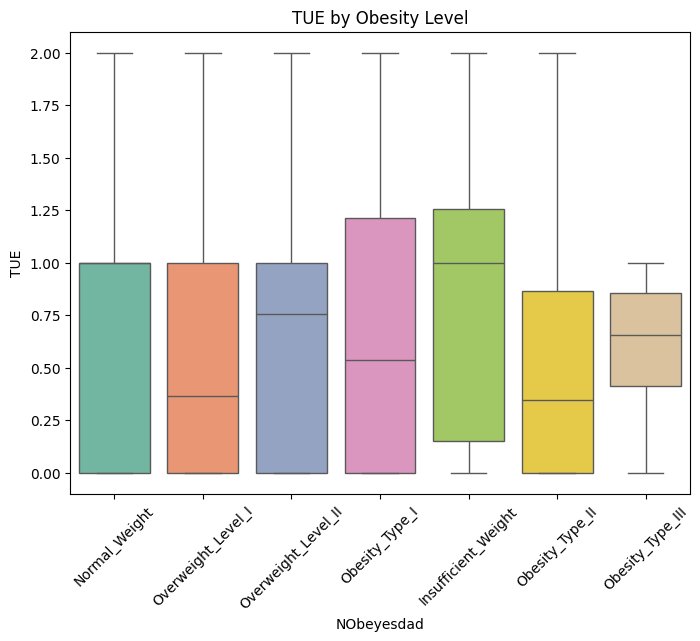

In [8]:
import warnings as wr
wr.filterwarnings('ignore')

# Continuous Features: Boxplots by Obesity Level
for feature in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="NObeyesdad", y=feature, palette="Set2")
    plt.title(f"{feature} by Obesity Level")
    plt.xticks(rotation=45)
    plt.show()

Findings from the Numerical Bivariate Analysis:

    Weight and Obesity Level: As expected, there is a clear relationship between weight and obesity level, which aligns with the formula used to calculate obesity categories.

    But there are also some suprising facts:

    Vegetable Consumption: Surprisingly, individuals with the highest obesity levels report consuming the most vegetables in their meals.

    Number of Meals per Day: People with insufficient weight tend to have the highest number of meals per day, which is an unexpected finding.

    Water Intake: Individuals with normal weight appear to drink less water compared to other categories, which is counterintuitive considering the common association between higher water consumption and healthier weight management.

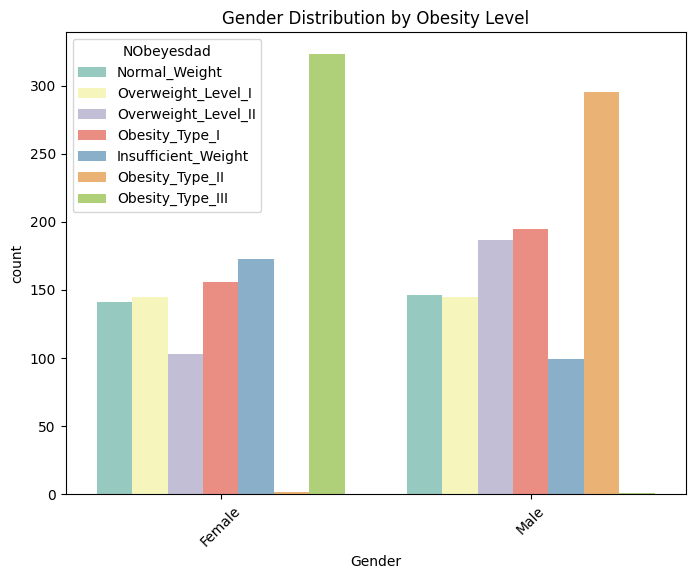

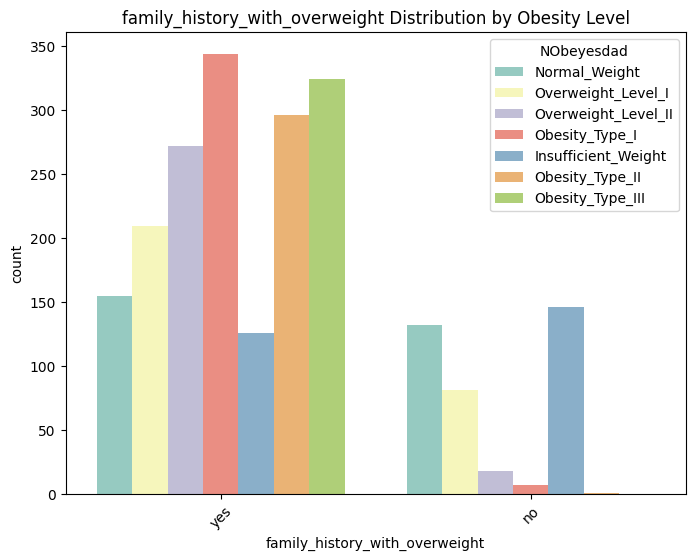

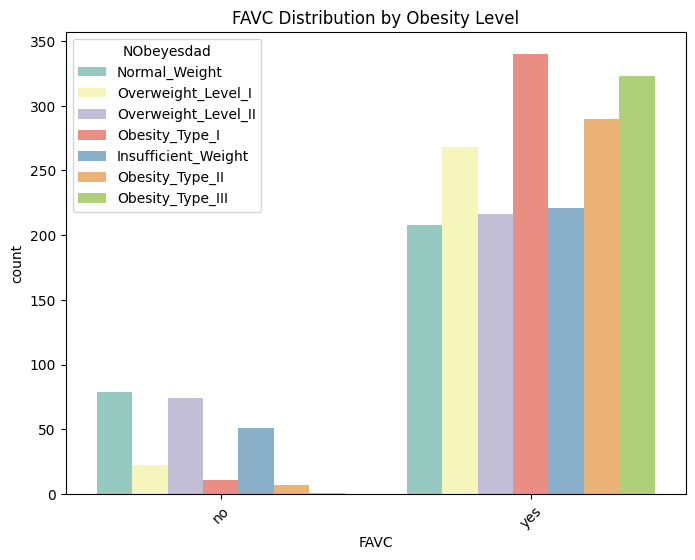

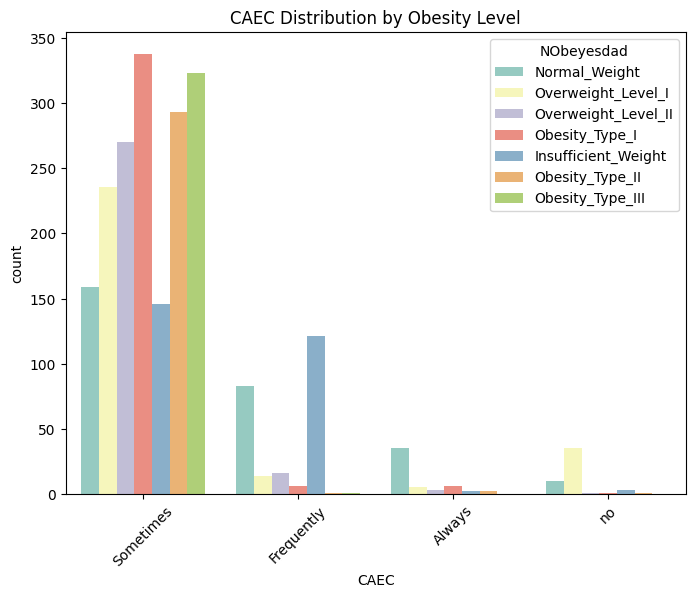

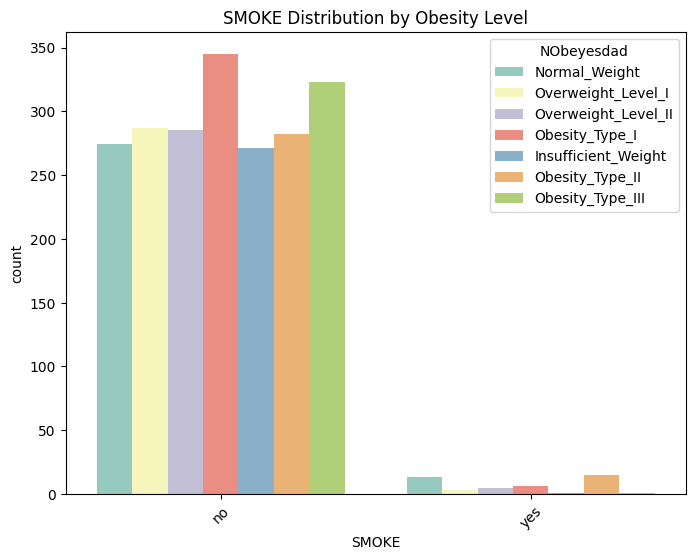

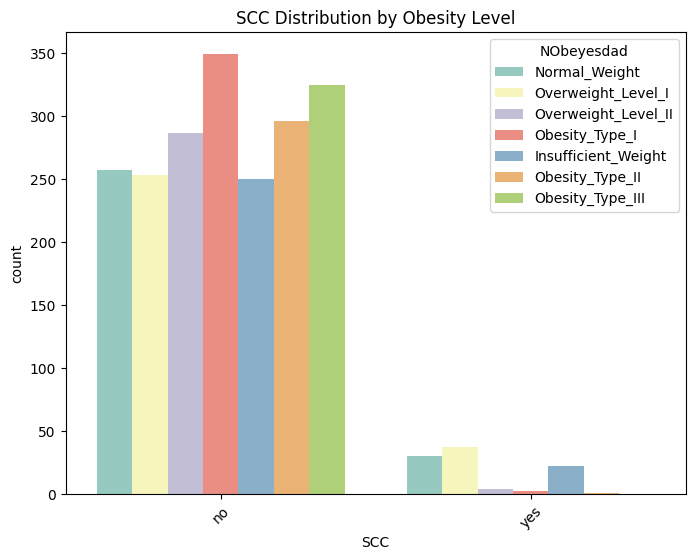

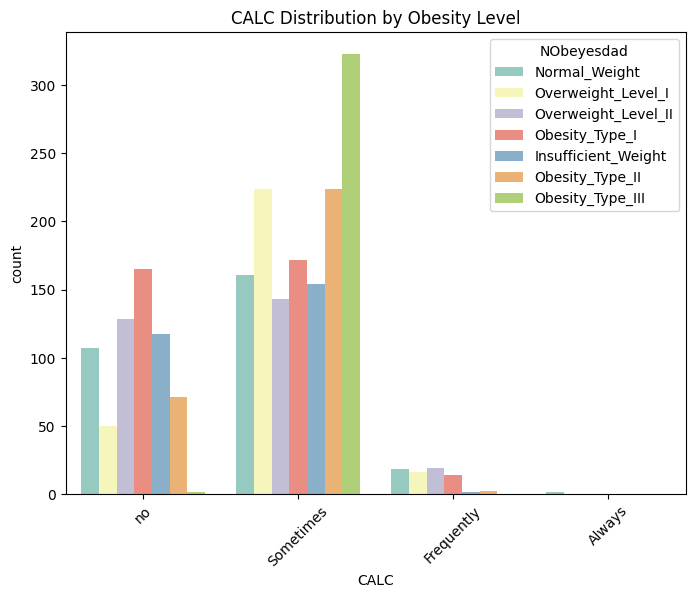

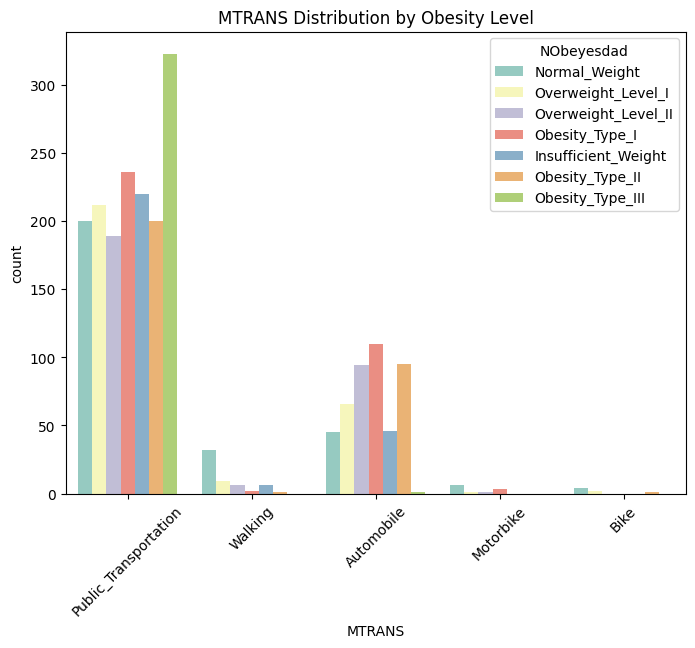

In [9]:
# Categorical/Binary Features: Countplots by Obesity Level
categorical_features = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, hue="NObeyesdad", palette="Set3")
    plt.title(f"{feature} Distribution by Obesity Level")
    plt.xticks(rotation=45)
    plt.show()

Findings from Bivariate Categorical Analysis:

    Family History and Obesity:
    There is a clear pattern between family history of obesity and obesity levels, where a family history of obesity strongly correlates with higher obesity levels, suggesting a genetic or behavioral predisposition.

    High-Caloric Food Consumption:
    Individuals with extreme obesity (Type II and III) tend to consume high-caloric foods more frequently, highlighting the significant role of dietary habits in obesity.

    Snacking Habits:
        Obesity Types I, II, and III are associated with snacking sometimes between meals, which aligns with the expectation that intermittent snacking may contribute to higher caloric intake.
        Surprisingly, individuals with insufficient weight frequently snack between meals, possibly indicating compensatory eating behaviors or smaller meal sizes.

    Alcohol Consumption:
    People with higher obesity levels tend to drink alcohol occasionally, which might contribute additional empty calories to their diet.

    Modes of Transportation:
        Those with higher obesity levels frequently use public transportation or automobiles, potentially reflecting lower levels of physical activity.
        In contrast, walking is strongly associated with normal weight and better obesity levels, reinforcing the importance of regular physical activity in maintaining a healthy weight.






# Multivariate Analysis

In [4]:
# to get a correlation matrix of all features we use One hot encoding and label encoding for the categorical features

from sklearn.preprocessing import LabelEncoder

# 1. One-Hot Encoding for Categorical Columns
categorical_cols = ['CAEC', 'CALC', 'MTRANS']  # List of categorical columns to encode
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # drop_first=True to avoid multicollinearity

# 2. Label Encoding for Binary Variables (Features)
binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SCC', 'SMOKE']  # List of binary columns
label_encoder = LabelEncoder()

# Apply label encoding to each binary column
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# 3. Label Encoding for the Target Variable
# Define the custom order of categories
custom_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Create a dictionary to map the custom order to labels
category_mapping = {category: idx for idx, category in enumerate(custom_order)}

# Apply the label encoder with the custom order
df['NObeyesdad_encoded'] = df['NObeyesdad'].map(category_mapping)

# Check the result to verify
print(df.head())


   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  SMOKE  CH2O  ...  CAEC_Sometimes  CAEC_no  CALC_Frequently  \
0  3.0      0   2.0  ...            True    False            False   
1  3.0      1   3.0  ...            True    False            False   
2  3.0      0   2.0  ...            True    False             True   
3  3.0      0   2.0  ...            True    False             True   
4  1.0      0   2.0  ...            True    False            False   

  CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
0          False     True        False      

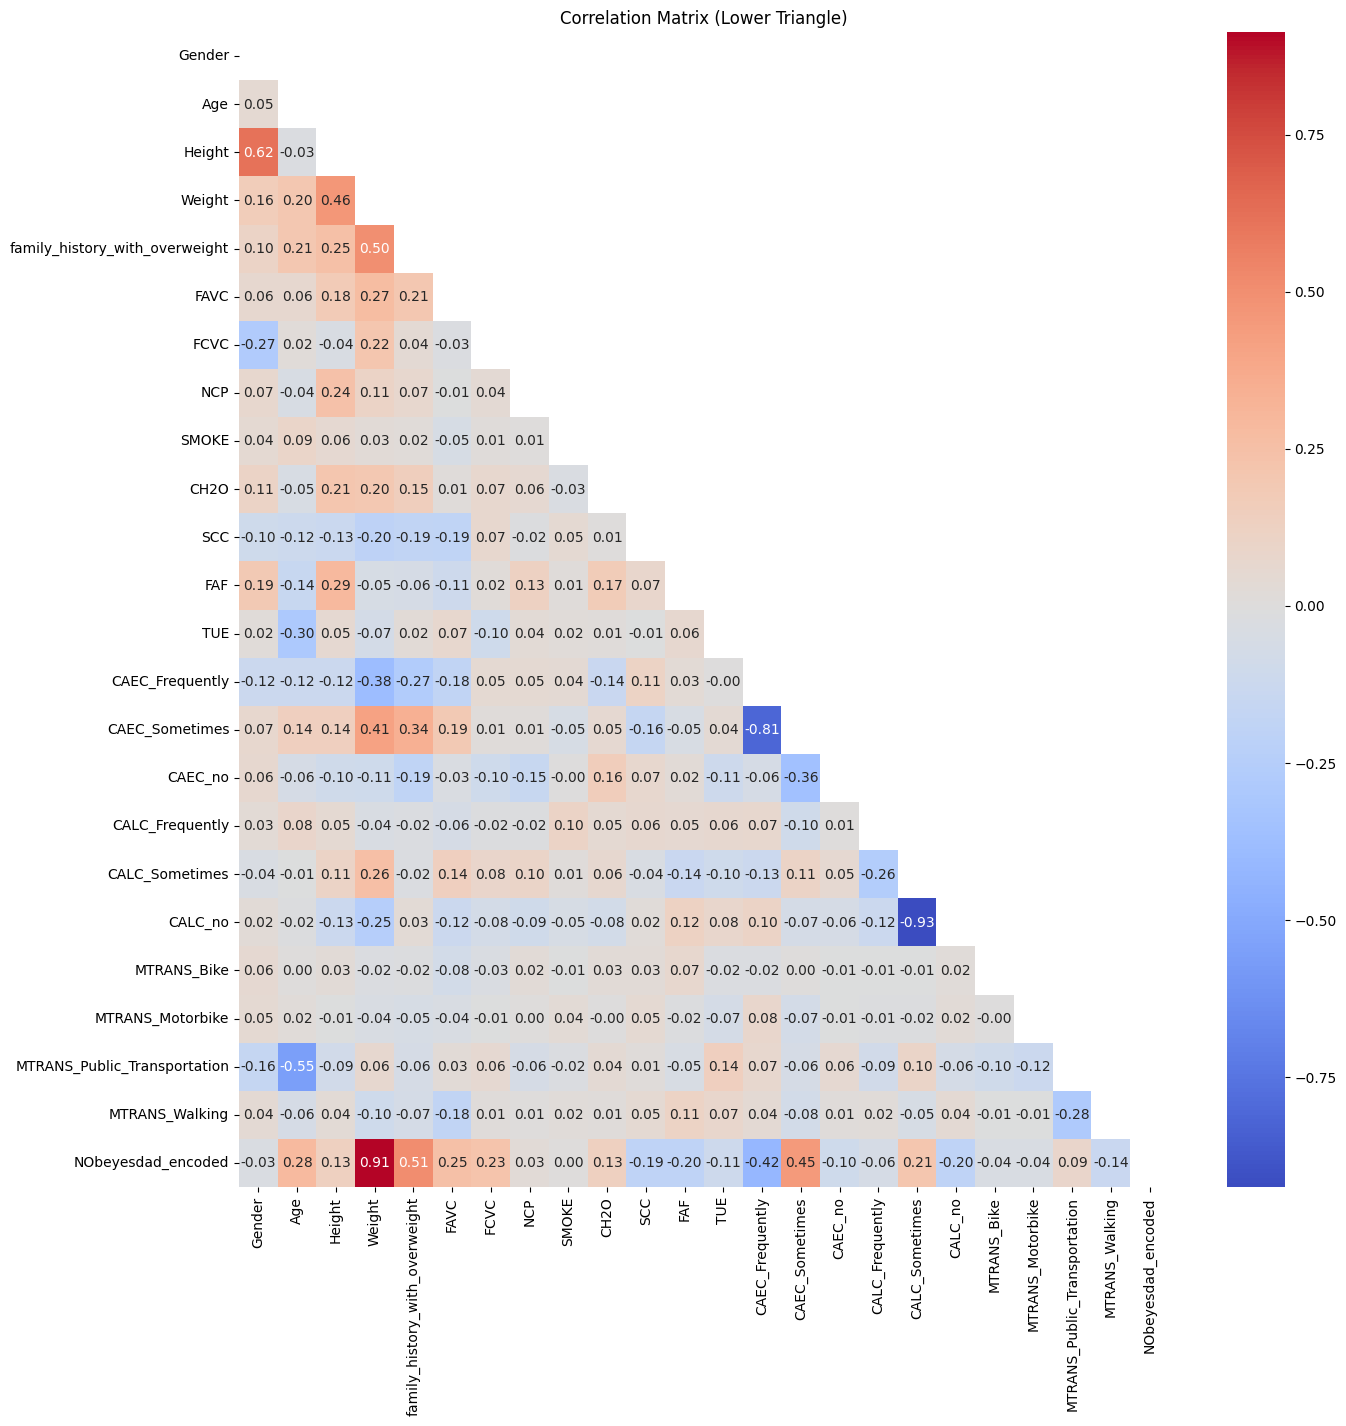

In [15]:
import numpy as np

# Correlation matrix
correlation_matrix = df.drop(columns=['NObeyesdad']).corr()
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Draw the heatmap with the mask
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Lower Triangle)")
plt.show()

Interpretation of Correlation Matrix:

The correlation matrix reveals several interesting insights:

1.   There is a very strong positive correlation between obesity and weight, which is expected, as weight is a primary factor in determining obesity levels.
2.    A weak positive correlation exists between family history of obesity and obesity, which aligns with findings from previous analyses indicating that a family history often leads to obesity.
3.   A weak positive correlation is also observed between obesity and snacking sometimes between meals, which appears logical as occasional snacking may contribute to excess caloric intake.
4.   Surprisingly, frequent snacking between meals shows a weak negative correlation with obesity. While unexpected, this pattern was also noted in earlier analyses and might indicate that individuals who snack more frequently may consume smaller portions or have other compensatory behaviors.


In addition, there is a strong correlation between height and gender, which is logical as men tend to be taller than women. However, some strong correlations between one-hot encoded categories were also observed, which is an expected yet undesired artifact of one-hot encoding due to the mutual exclusivity of the categories.

Final Statement: Conclusion of Exploratory Data Analysis (EDA)

The EDA highlights that obesity is primarily influenced by weight, which is expected given the direct relationship between body mass index (BMI) and obesity levels. Additionally, a family history of obesity emerges as a significant risk factor, reinforcing the role of genetic and behavioral predispositions in weight management.

Surprisingly, when examining eating habits and physical activity levels, no strong patterns or correlations were observed. While snacking sometimes is associated with a higher risk of obesity, frequent snacking appears to correlate with lower weight. This unexpected finding might suggest that individuals who snack frequently consume smaller portions during main meals or choose healthier snacks. However, the survey data does not account for portion sizes or the nutritional quality of meals and snacks, leaving room for interpretation.

Physical activity, while contributing positively, shows only a slight influence in reducing obesity levels. It’s important to note that the survey measures physical activity subjectively, which may lead to inconsistencies in how participants interpret and report their activity levels.

The dataset and subsequent analysis underline the complexity of obesity, driven by a mix of physiological, behavioral, and lifestyle factors. Moreover, these findings are limited by the survey design, which relies on self-reported data, potentially introducing bias or variability in responses. Future studies could benefit from more objective measures, such as tracking caloric intake, portion sizes, and physical activity with wearable devices, to provide deeper insights into the factors influencing obesity.

# Predictive model

In [2]:
from google.colab import files
import pandas as pd
import io
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
!pip install scikit-optimize
from skopt import BayesSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, DMatrix
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [3]:
# upload file from personal device
uploaded = files.upload()

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic (1).csv


In [4]:
# repeating the previous pre processing steps

df = pd.read_csv(io.BytesIO(uploaded['ObesityDataSet_raw_and_data_sinthetic (1).csv']))

# 1. One-Hot Encoding for Categorical Columns
categorical_cols = ['CAEC', 'CALC', 'MTRANS']  # List of categorical columns to encode
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # drop_first=True to avoid multicollinearity

# 2. Label Encoding for Binary Variables (Features)
binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SCC', 'SMOKE']  # List of binary columns
label_encoder = LabelEncoder()

# Apply label encoding to each binary column
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# 3. Label Encoding for the Target Variable
# Define the custom order of categories
custom_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Create a dictionary to map the custom order to labels
category_mapping = {category: idx for idx, category in enumerate(custom_order)}

# Apply the label encoder with the custom order
df['NObeyesdad_encoded'] = df['NObeyesdad'].map(category_mapping)

df = df.drop(columns=['NObeyesdad'])

In [5]:
pd.set_option('display.max_columns', None)
print(df.head())



   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  SMOKE  CH2O  SCC  FAF  TUE  CAEC_Frequently  CAEC_Sometimes  CAEC_no  \
0  3.0      0   2.0    0  0.0  1.0            False            True    False   
1  3.0      1   3.0    1  3.0  0.0            False            True    False   
2  3.0      0   2.0    0  2.0  1.0            False            True    False   
3  3.0      0   2.0    0  2.0  0.0            False            True    False   
4  1.0      0   2.0    0  0.0  0.0            False            True    False   

   CALC_Frequently  CALC_Sometimes  CALC_no 

In [6]:
# Split data into features and target
X = df.drop(columns=['NObeyesdad_encoded'])
y = df['NObeyesdad_encoded']

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scaling quantitative features
quantitative_cols = ['Height', 'Weight', 'Age', 'FCVC', 'CH2O', 'NCP', 'FAF', 'TUE']
scaler = StandardScaler()

# Scale the quantitative columns
X_train_scaled = scaler.fit_transform(X_train[quantitative_cols])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=quantitative_cols, index=X_train.index)

# Replace the quantitative columns with scaled values
X_train_processed = X_train.copy()
X_train_processed.update(X_train_scaled)

X_test_scaled = scaler.transform(X_test[quantitative_cols])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=quantitative_cols, index=X_test.index)
X_test_processed = X_test.copy()
X_test_processed.update(X_test_scaled)

# change boolean datatype of the one hot encoding
X_train_processed = X_train_processed.astype(float)
X_test_processed = X_test_processed.astype(float)



In [8]:
pd.set_option('display.max_columns', None)
print(X_train_processed.head())

      Gender       Age    Height    Weight  family_history_with_overweight  \
361      0.0  2.442540 -1.522180 -0.267541                             1.0   
1818     0.0  0.245463 -0.634479  0.946080                             1.0   
1057     1.0  0.001406  0.185504 -0.026864                             1.0   
1866     0.0 -0.537702  0.135493  1.707677                             1.0   
1064     1.0 -0.368559  0.910022  0.105763                             1.0   

      FAVC      FCVC       NCP  SMOKE      CH2O  SCC       FAF       TUE  \
361    1.0 -0.793106 -2.140838    0.0 -0.037785  0.0  1.155158 -1.074857   
1818   1.0  1.065827  0.418106    0.0  0.977953  0.0 -1.180017 -0.845840   
1057   1.0 -0.793106  0.005723    0.0  1.092788  0.0 -1.180017  0.062287   
1866   1.0  1.065827  0.418106    0.0 -0.510954  0.0  0.679359  0.455371   
1064   1.0 -1.317036 -1.333256    0.0 -0.037785  0.0 -1.180017 -0.568897   

      CAEC_Frequently  CAEC_Sometimes  CAEC_no  CALC_Frequently  \
361    

end of pre processing - modelling the predictive models

In [9]:
# Logistic Regression model:

log_reg = LogisticRegression(max_iter=1000)
log_reg_params = {
    'C': (1e-3, 1e3, 'log-uniform'),
    'solver': ['lbfgs', 'liblinear']
}

# KNN model:

knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': (1, 30),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Minkowski metric, p=1 (Manhattan), p=2 (Euclidean)
}

# Decision tree

tree = DecisionTreeClassifier()
tree_params = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

In [10]:
import warnings as wr
wr.filterwarnings('ignore')

# Logistic Regression
log_reg_search = BayesSearchCV(log_reg, log_reg_params, n_iter=30, cv=5, scoring='accuracy')
log_reg_search.fit(X_train_processed, y_train)

# KNN and Decision Tree
knn_search = BayesSearchCV(knn, knn_params, n_iter=30, cv=5, scoring='accuracy')
knn_search.fit(X_train_processed, y_train)

tree_search = BayesSearchCV(tree, tree_params, n_iter=30, cv=5, scoring='accuracy')
tree_search.fit(X_train_processed, y_train)

BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=30,
              scoring='accuracy',
              search_spaces={'max_depth': (1, 20), 'min_samples_leaf': (1, 20),
                             'min_samples_split': (2, 20)})

In [11]:
# evaluate models on the test set

# Logistic Regression
best_log_reg = log_reg_search.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test_processed)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# KNN
best_knn = knn_search.best_estimator_
y_pred_knn = best_knn.predict(X_test_processed)
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Decision Tree
best_tree = tree_search.best_estimator_
y_pred_tree = best_tree.predict(X_test_processed)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Logistic Regression Test Accuracy: 0.9550827423167849
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        57
           1       0.95      0.92      0.93        59
           2       0.85      0.90      0.87        58
           3       0.94      0.89      0.91        65
           4       0.98      1.00      0.99        64
           5       1.00      1.00      1.00        62
           6       1.00      1.00      1.00        58

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.95       423
weighted avg       0.96      0.96      0.96       423

KNN Test Accuracy: 0.8770685579196218
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        57
           1       0.69      0.58      0.63        59
           2       0.84      0.83      0.83        58
           3       0.82      0.91      0.86        65
           4       0.88      0.95      0

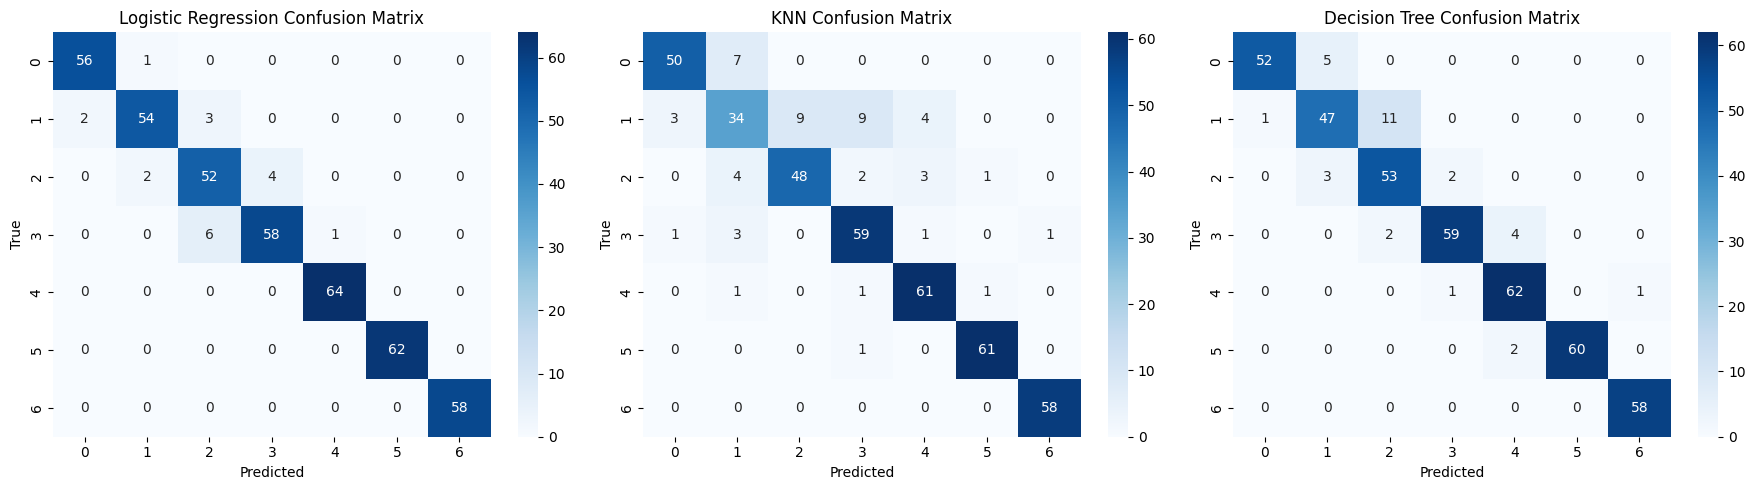

In [12]:
# Logistic Regression Confusion Matrix
y_pred_logreg = best_log_reg.predict(X_test_processed)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# KNN Confusion Matrix
y_pred_knn = best_knn.predict(X_test_processed)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Decision Tree Confusion Matrix
y_pred_dt = best_tree.predict(X_test_processed)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Logistic Regression
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("Logistic Regression Confusion Matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("True")

# KNN
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title("KNN Confusion Matrix")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("True")

# Decision Tree
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', ax=axs[2])
axs[2].set_title("Decision Tree Confusion Matrix")
axs[2].set_xlabel("Predicted")
axs[2].set_ylabel("True")

plt.tight_layout()
plt.show()

Logistic Regression:


Logistic regression has a high accuracy, precision, recall, and F1-score for most classes, particularly showing great balance across the classes. The performance is strong across the board, making it a solid contender.

KNN:

KNN shows lower performance, particularly for class 1, where the recall is much lower. However, for classes 0, 2, and others, its performance is strong. Still, it's not as balanced across all classes as logistic regression.

Decision Tree:

Decision Tree performed well with high precision and recall for many classes, with a slight drop in performance for class 1 (similar to KNN).

Final Verdict:

Logistic Regression performs the best among the three models. It offers the highest accuracy and consistently strong metrics across all the classes, making it the most reliable choice for this task.


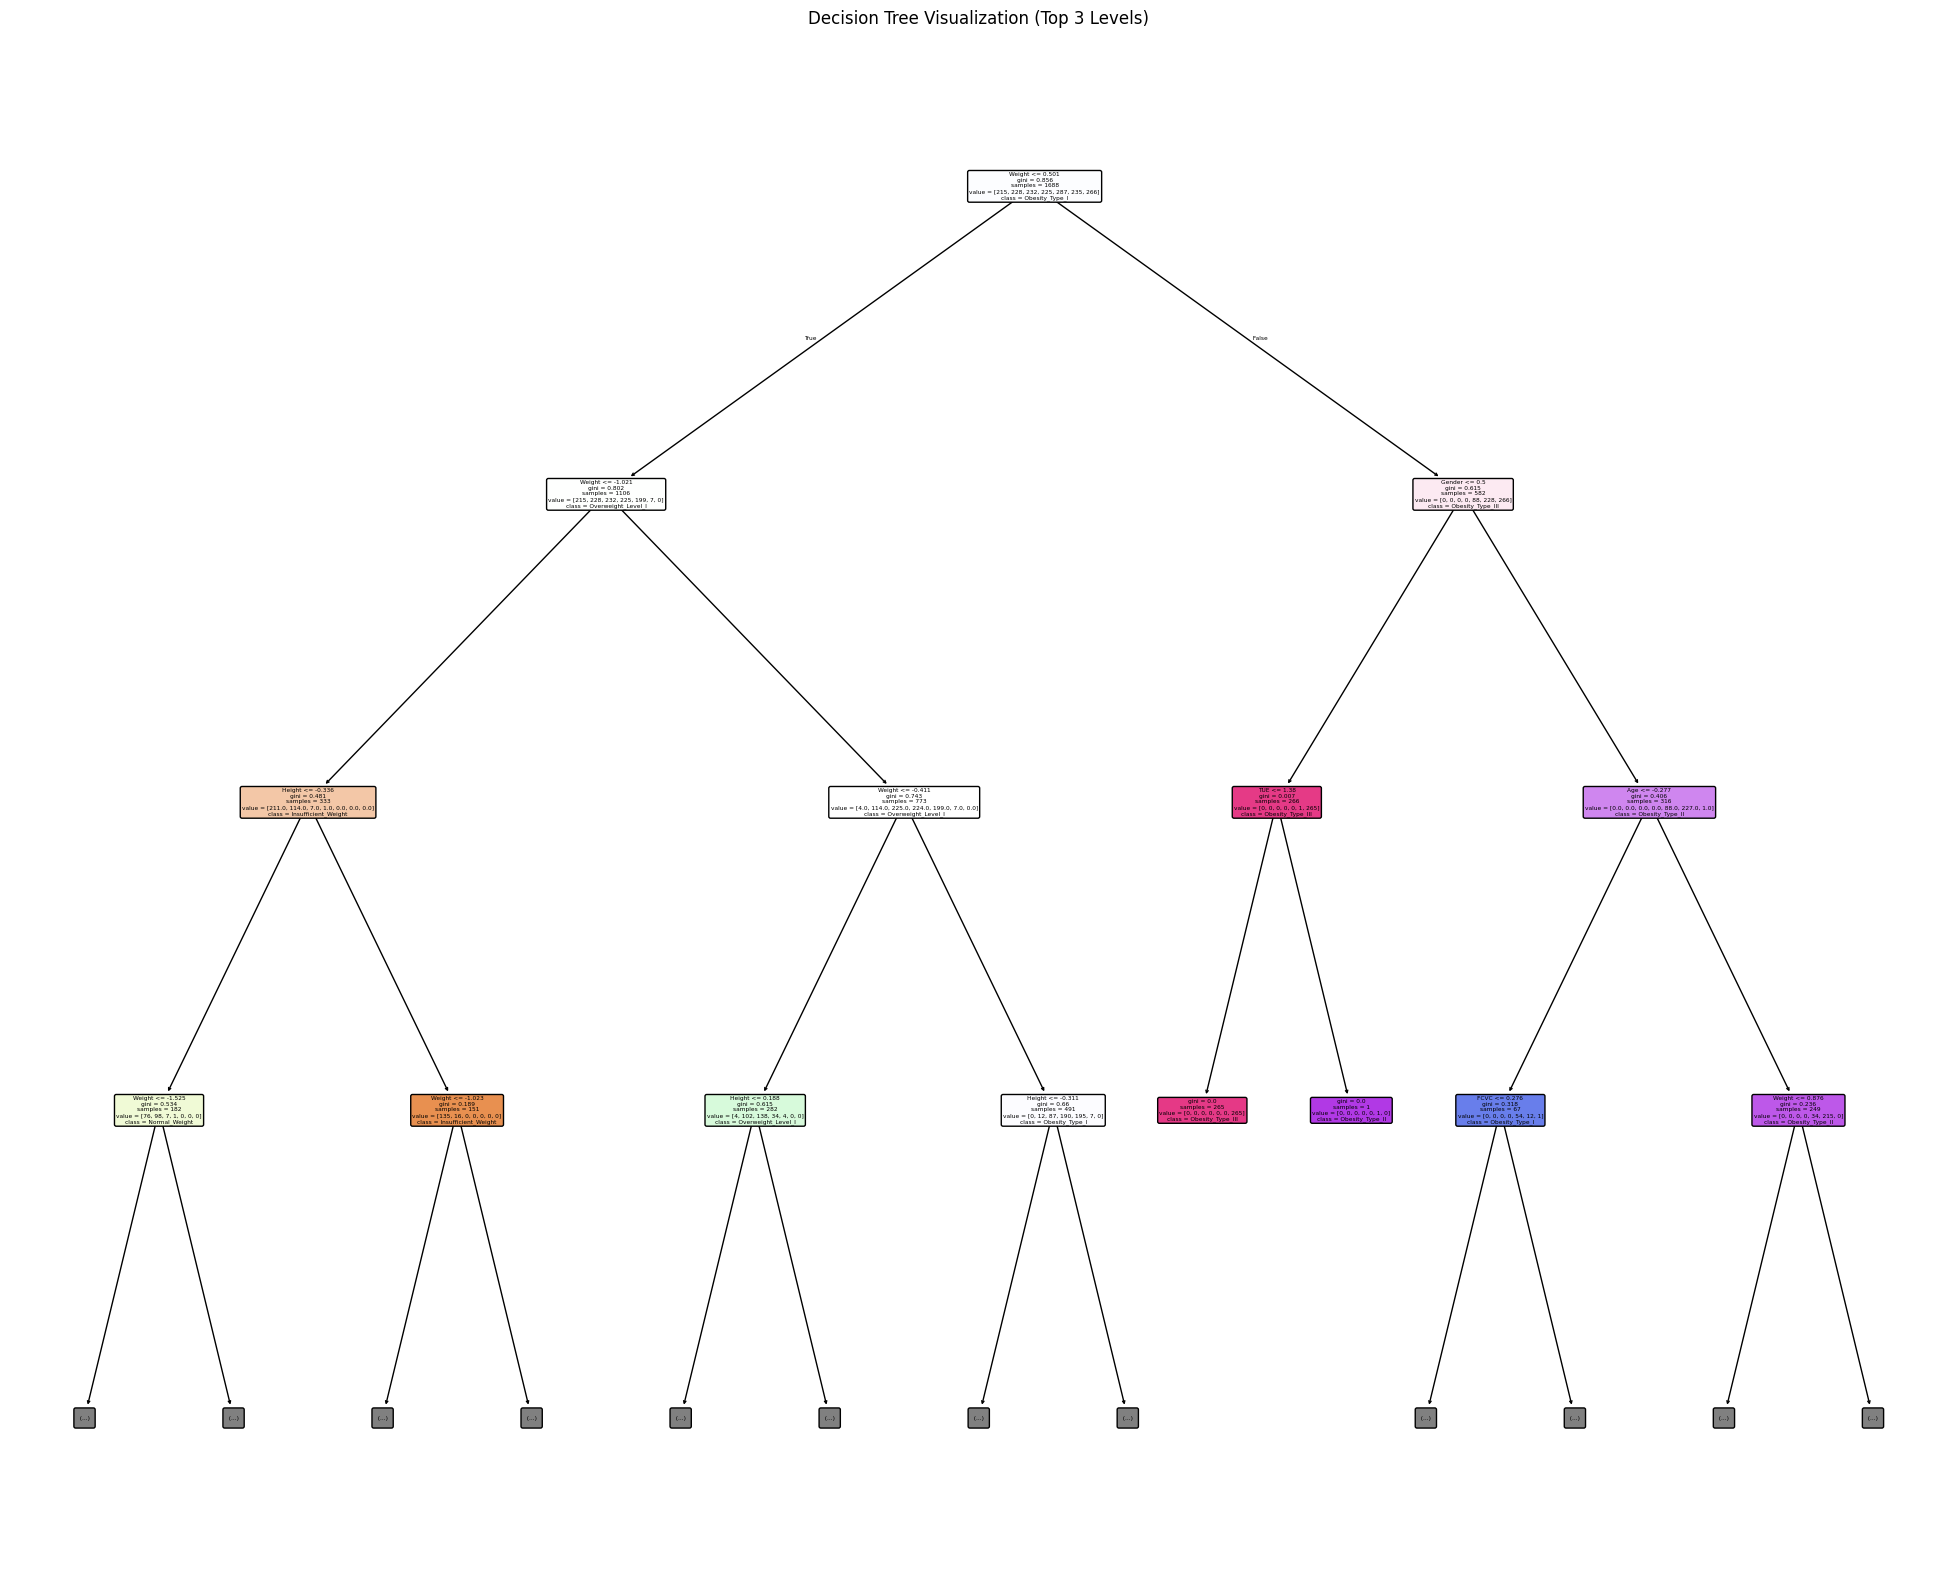

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 20))
plot_tree(
    best_tree,
    feature_names=X_train_processed.columns,
    filled=True,
    rounded=True,
    max_depth=3  # Show only the top 3 levels
)
plt.title("Decision Tree Visualization (Top 3 Levels)")
plt.show()

Interpreting the Decision Tree Plot:
The decision tree provides a visual representation of how the model makes predictions based on the input features.

    Primary Influence:
    The feature at the root of the tree, weight, is the most influential predictor of obesity. This aligns with the expected relationship between weight and obesity levels.

    Secondary Influence:
    Height appears as another key feature in subsequent splits. Together, weight and height effectively capture the relationship underpinning the Body Mass Index (BMI), which is commonly used to classify obesity. The model correctly identified and leveraged this pattern.

    Additional Features:
    While weight and height dominate the early levels of the tree, other features such as eating habits, physical activity, or demographic data might appear in deeper splits.

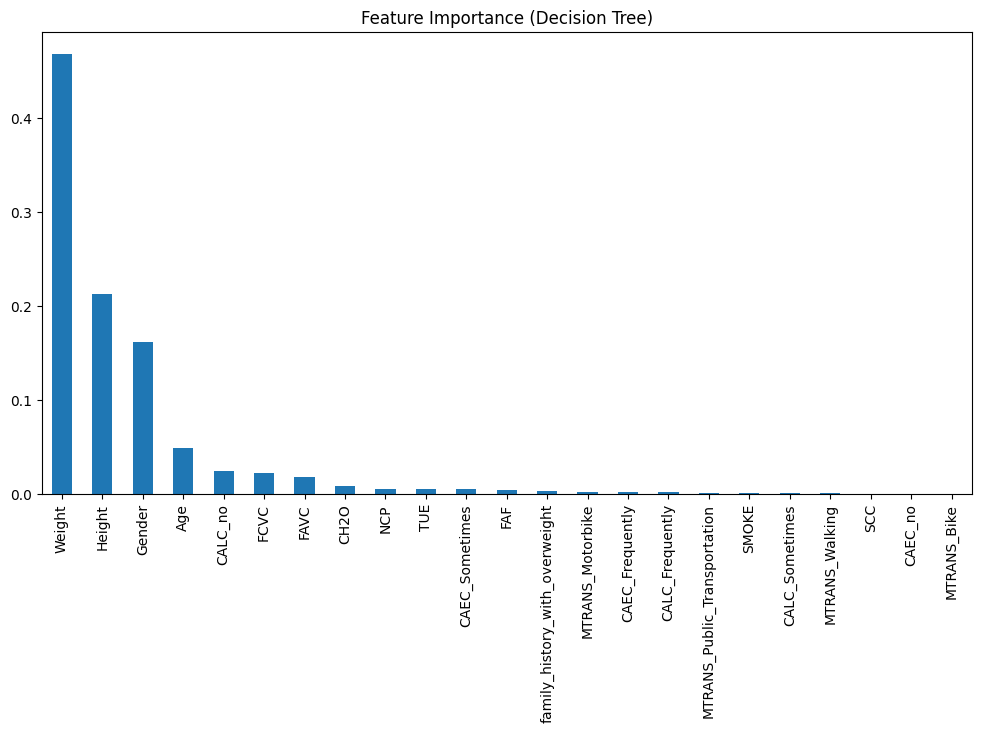

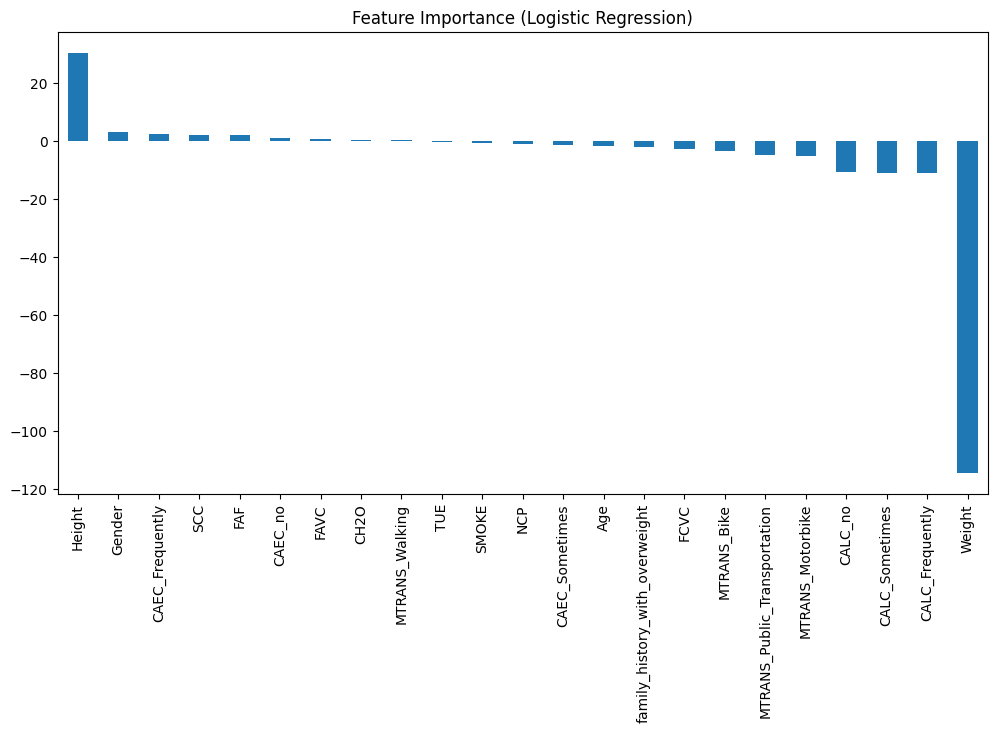

In [13]:
# Feature Importance forDecision tree (coefficients)
feature_importance_dt = pd.Series(best_tree.feature_importances_, index=X_train_processed.columns).sort_values(ascending=False)
feature_importance_dt.plot(kind='bar', figsize=(12, 6), title="Feature Importance (Decision Tree)")
plt.show()

# Feature Importance for Logistic Regression (coefficients)
coefficients_logreg = pd.Series(best_log_reg.coef_[0], index=X_train_processed.columns).sort_values(ascending=False)
coefficients_logreg.plot(kind='bar', figsize=(12, 6), title="Feature Importance (Logistic Regression)")
plt.show()

Summary of Feature Importance Findings
Both models identify correctly Weight and Height as the most critical predictors of obesity, with their relative importance consistent across the methods. However, notable differences emerge in the secondary features:

    The decision tree emphasizes the influence of eating behavior and physical activity.
    Logistic regression highlights the impact of alcohol consumption.
    Family history with overweight has surprisingly only a small influence in both models.

XGBoost model

In [ ]:
# due to compatibility issues
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.4.2

In [9]:
# Step 1: Define the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Step 2: Define the parameter search space
search_space = {
    'n_estimators': (50, 300),  # Range of values
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0),
}

# Step 3: Set up Bayesian Search
bayes_search = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=search_space,
    scoring='accuracy',  # Use desired metric
    cv=5,  # 5-fold cross-validation
    n_iter=50,  # Number of evaluations
    random_state=42,
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Step 4: Fit the randomized search
bayes_search.fit(X_train_processed, y_train)

# Step 5: Evaluate the best model
best_xgb = bayes_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_processed)

print("Best Parameters:", bayes_search.best_params_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:34:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: OrderedDict([('colsample_bytree', 0.8644756591371849), ('learning_rate', 0.12651906558173256), ('max_depth', 5), ('n_estimators', 213), ('subsample', 0.9936687977865617)])


XGBoost Test Accuracy: 0.9716312056737588
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        64
           1       0.92      0.97      0.95        63
           2       0.95      0.97      0.96        59
           3       0.95      0.98      0.96        41
           4       0.99      0.98      0.98        83
           5       1.00      0.98      0.99        59
           6       1.00      1.00      1.00        54

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



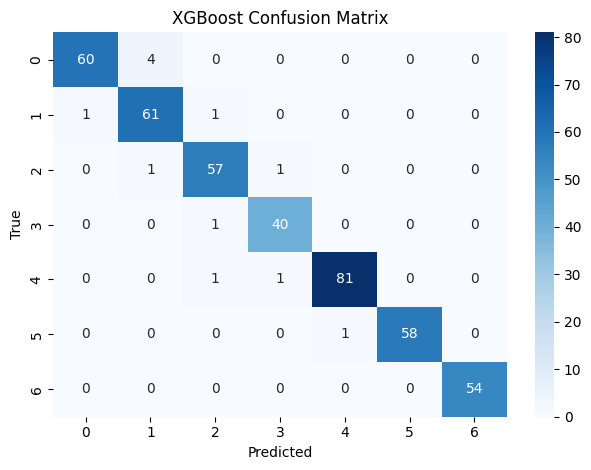

In [10]:
# printing the results

print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# XGBoost Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Create a figure and axes for the plot
fig, ax = plt.subplots()

sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title("XGBoost Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("True")

plt.tight_layout()
plt.show()

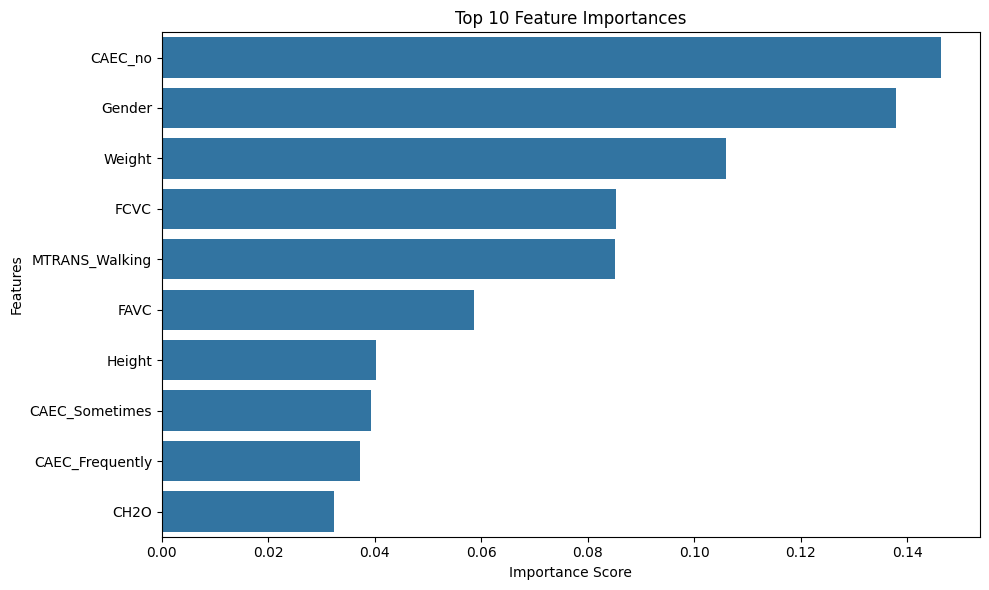

In [11]:
# Get feature importance from the best model
importance = best_xgb.feature_importances_

# Map feature names to their importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))  # Top 10 features
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [12]:
# saving the best XGBoost model
best_xgb.save_model("xgb_obesity_model.json")

Interpretation of the XGBoost Model:

The XGBoost model demonstrates the highest overall accuracy among all the models tested, indicating its superior ability to capture complex patterns in the dataset. However, its feature importance profile deviates significantly from the other models:

    Key Features:
        Snacking behavior emerges as the most influential predictor, highlighting its critical role in determining obesity levels.
        Gender is the second most important feature, suggesting a noticeable variation in obesity patterns between genders.

    Comparison with Other Models:
        Unlike the logistic regression and decision tree models, weight and height, which are mathematically tied to obesity, rank third and sixth in importance. This implies that XGBoost places more emphasis on behavioral and categorical variables over physical measurements.
        Vegetable consumption frequency also ranks highly, showcasing the importance of dietary habits.

    Family History:
        Similar to other models, family history plays a surprisingly minimal role in predictions. This finding suggests that genetic predisposition, while relevant, is overshadowed by behavioral and lifestyle factors in this dataset.

Insights:

    XGBoost's ability to capture non-linear relationships may explain its focus on behavioral features like snacking and vegetable consumption.
    The reduced importance of weight and height might indicate that the model leverages other features to predict obesity indirectly, rather than relying solely on these direct indicators.
    The consistent low importance of family history across models raises questions about its representation in the dataset or its true influence in predicting obesity.

Creaating a dense neural network to make predictions on this dataset

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade tensorflow
!pip install keras-tuner --upgrade
!pip install scikit-learn
!pip install --upgrade scikit-learn

In [11]:
 import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [12]:
# Define the model-building function
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float('dropout_layer1', min_value=0.1, max_value=0.5, step=0.1)))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_layer{i+2}', min_value=32, max_value=256, step=32), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_layer{i+2}', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(7, activation='softmax'))  # Adjust output neurons and activation for multi-class classification
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Set up the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='dnn_tuning',
    project_name='obesity_dnn'
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

# Perform the search
tuner.search(X_train_processed, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=1)

# Retrieve the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Summary of the best model
print("Summary of the Best Model:")
best_model.summary()

# Train the best model with the callbacks
history = best_model.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=50,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_processed, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Trial 10 Complete [00h 00m 15s]
val_accuracy: 0.4615384638309479

Best val_accuracy So Far: 0.9822485446929932
Total elapsed time: 00h 02m 52s
Summary of the Best Model:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 224)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 224)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          14,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,231 (79.03 KB)

 Trainable params: 20,231 (79.03 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2815 - loss: 1.8276 - val_accuracy: 0.5710 - val_loss: 1.2737 - learning_rate: 0.0010
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5715 - loss: 1.2108 - val_accuracy: 0.6361 - val_loss: 0.8815 - learning_rate: 0.0010
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6595 - loss: 0.8957 - val_accuracy: 0.7278 - val_loss: 0.6755 - learning_rate: 0.0010
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7428 - loss: 0.6948 - val_accuracy: 0.8195 - val_loss: 0.5387 - learning_rate: 0.0010
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7951 - loss: 0.5770 - val_accuracy: 0.8550 - val_loss: 0.4510 - learning_rate: 0.0010
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8337 - loss: 0.4906 - val_accuracy: 0.8698 - val_loss: 0.3906 - learning_rate: 0.0010
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8329 - loss: 0.4586 - val_accuracy: 

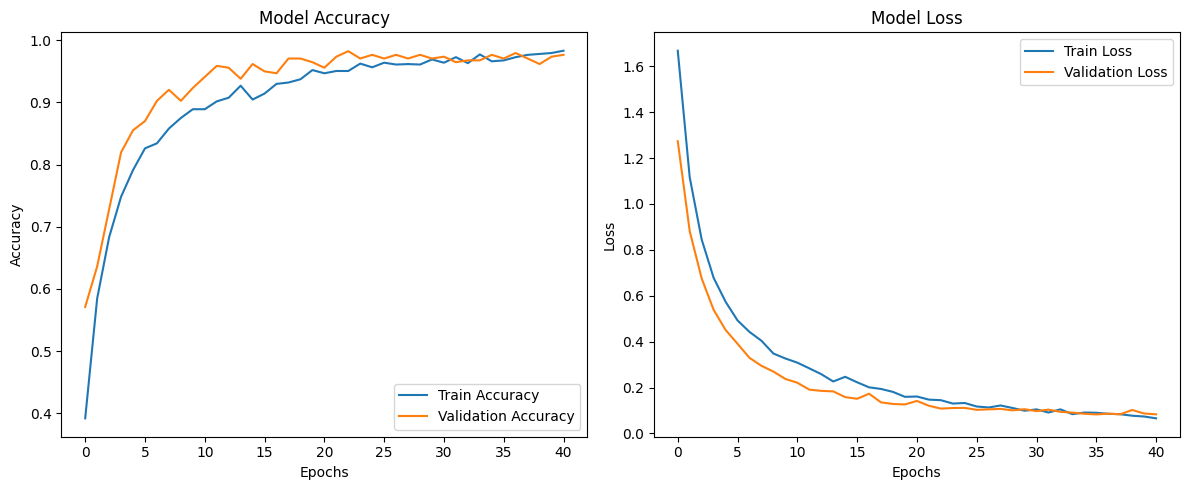

In [13]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Accuracy Plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

The training and validation accuracy and loss curves for the DNN model show consistent and smooth improvements over the training epochs, indicating effective learning. Both the training and validation accuracy converge to high values, with no significant divergence, suggesting minimal overfitting. Similarly, the loss curves steadily decrease and plateau without irregular spikes, confirming stable optimization. These results reflect a well-tuned model with robust generalization capabilities.

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


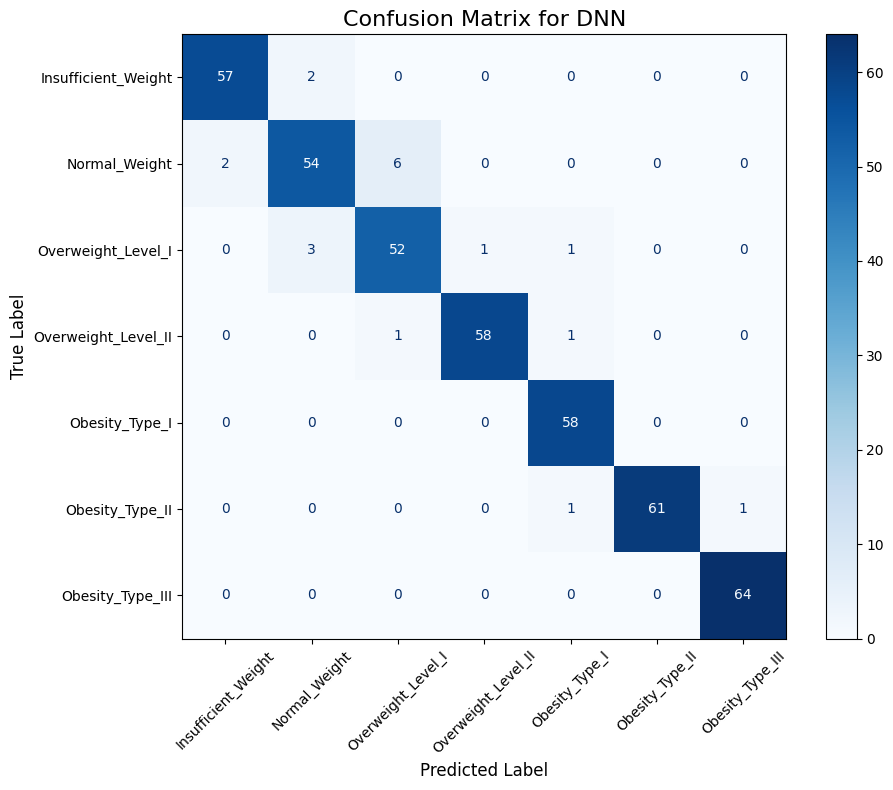

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predictions on the test set
y_pred = best_model.predict(X_test_processed)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class indices
y_true = y_test.to_numpy()

# Confusion Matrix
class_names=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=45)  # Rotate x-axis labels for better readability
plt.title("Confusion Matrix for DNN", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()

# Result

All tested models demonstrated strong performance in predicting obesity levels, showcasing the dataset's suitability for classification tasks. Logistic Regression, Decision Tree, XGBoost, and DNN achieved high accuracy, with XGBoost emerging as the best-suited model for this dataset. It delivered the highest accuracy and provided unique insights into feature importance, emphasizing eating behavior and gender over traditional predictors like weight and height.

While the DNN performed competitively, it is generally more advantageous for large, unstructured datasets, where its capacity to capture complex, non-linear patterns shines. In this structured dataset, XGBoost's ability to handle tabular data effectively and interpret feature importance made it the optimal choice, combining accuracy and valuable insights into obesity predictors.